In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
### independent and dependent faetures

In [11]:
y=df['FWI']
x=df.drop('FWI',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)


In [13]:
### feature selection 

<Axes: >

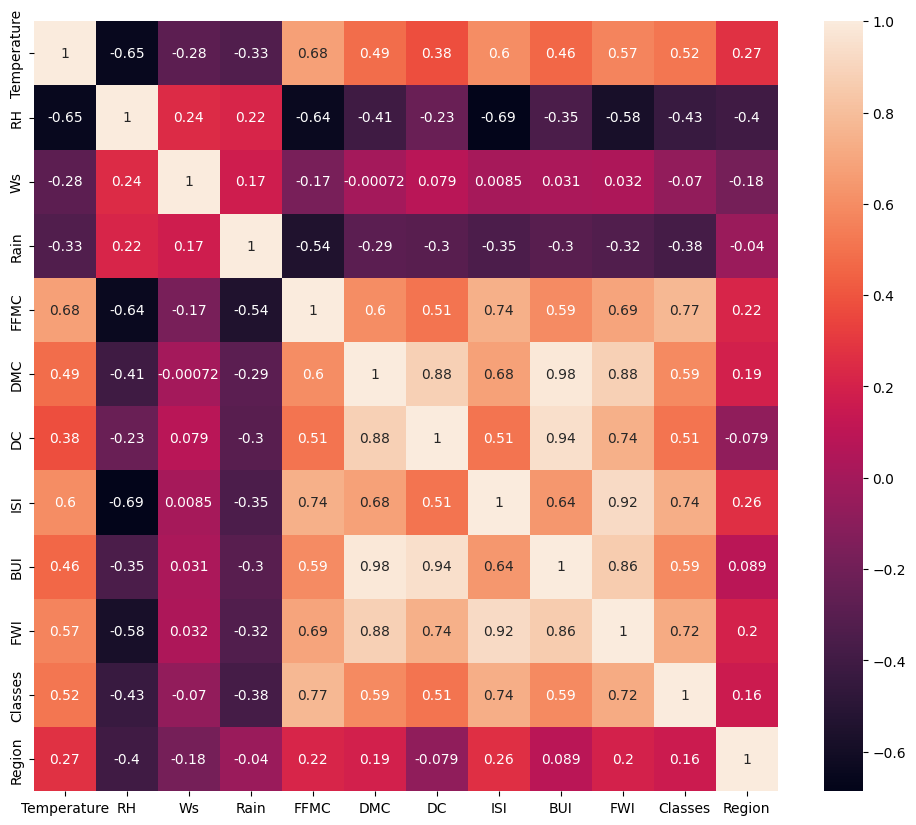

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True,)

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold :
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [16]:
corr_features=correlation(x_train,0.85)

In [17]:
x_train.drop(corr_features,axis=1,inplace=True)

In [18]:
x_test.drop(corr_features,axis=1,inplace=True)

In [19]:
## feature scaling or standardization 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
## box plots to understand how standardscaler works 

Text(0.5, 1.0, 'with standardization')

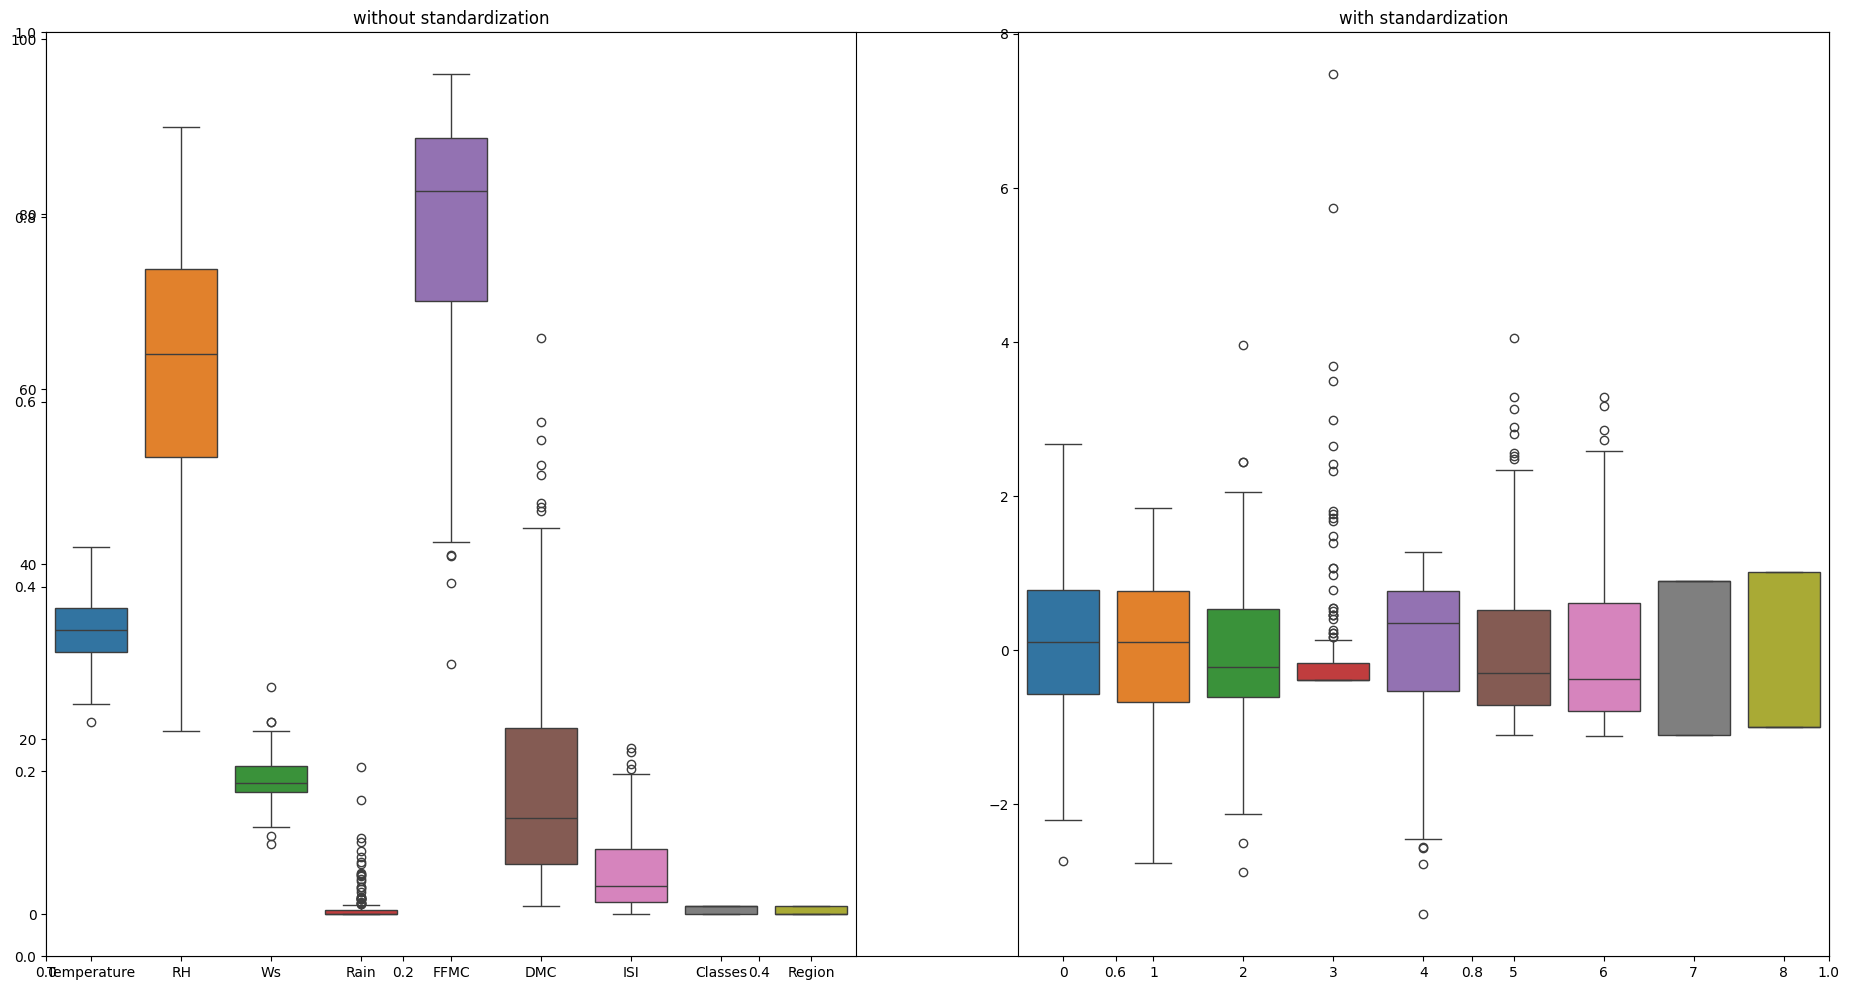

In [22]:
plt.subplots(figsize=(23,12))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('without standardization')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('with standardization')

In [23]:
#linear regression model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
model=LinearRegression()

In [26]:
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean squared error : ", mae)
print("R2 Score : ", score)



Mean squared error :  0.5468236465249978
R2 Score :  0.9847657384266951


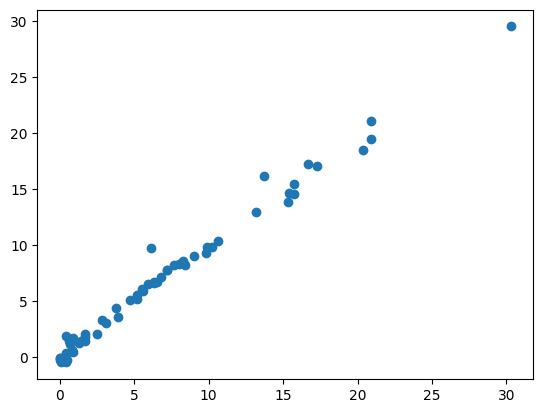

In [27]:
plt.scatter(y_test,y_pred)

In [28]:
### lasso regression 

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean squared error : ", mae)
print("R2 Score : ", score)



Mean squared error :  1.133175994914409
R2 Score :  0.9492020263112388


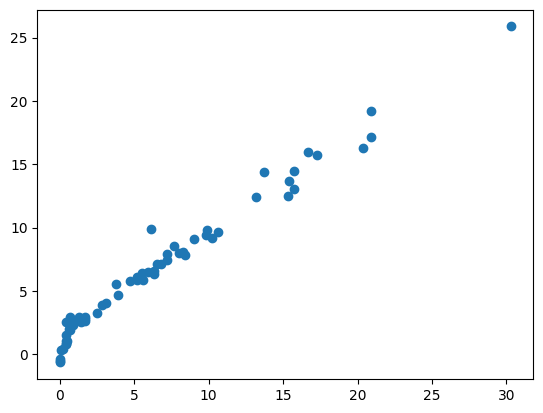

In [30]:
plt.scatter(y_test,y_pred)

In [31]:
### ridge 

In [46]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean squared error : ", mae)
print("R2 Score : ", score)


Mean squared error :  0.5642305340105715
R2 Score :  0.9842993364555512


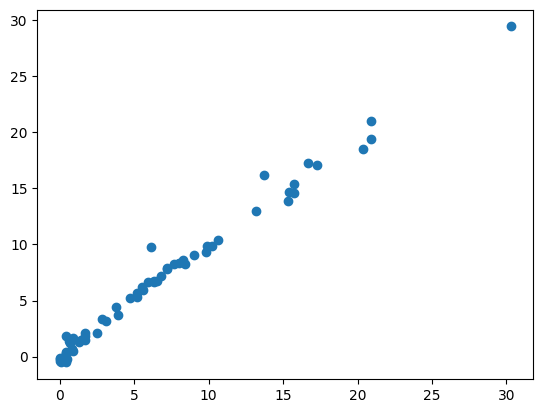

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
## Elastic Net 

In [43]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean squared error : ", mae)
print("R2 Score : ", score)


Mean squared error :  1.8822353634896005
R2 Score :  0.8753460589519703


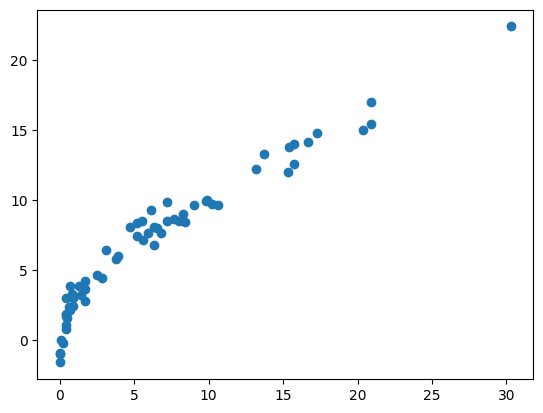

In [36]:
plt.scatter(y_test,y_pred)


In [37]:
#pickle the model
import pickle



In [38]:
scaler 

StandardScaler()

In [47]:
ridge

Ridge()

In [48]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))